In [28]:
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt 
import math
#import arviz as az
import numpy as np
import timedelta

from scipy.optimize import curve_fit

from marsQuakesParse import*

ModuleNotFoundError: No module named 'timedelta'

In [2]:
#%config Inline.figure_format = 'retina'
#az.style.use('arviz-darkgrid')

In [3]:
filepath = "events_mars_extended_multiorigin_v6_2021-01-01.xml"

In [4]:
xtree = ElementTree.parse(filepath)
xroot = xtree.getroot()
#
xeventParameters = xroot.findall('d:eventParameters',ns)
#
for ep in xeventParameters:
    xevents = ep.findall('d:event',ns)
    print(f'Found {(len(xevents))} events.' ) 
#
magnitudes = []
picks = []
events = []
#
i = 0
for xev in xevents:
    # build an event dictionary 
    ev = {}
    #ev['eventid'] = xev.attrib["{http://purl.org/dc/elements/1.1/}eventid"]
    ev['publicID'] = xev.attrib['publicID']
    #ev['eventsource'] = xev.attrib['{http://quakeml.org/xmlns/marsquake/1.0}eventsource']
    #ev['datasource'] = xev.attrib['{http://quakeml.org/xmlns/marsquake/1.0}datasource']
    ev['preferredOriginID'] = xev.find("d:preferredOriginID",ns).text
    #ev['preferredMagnitudeID'] = xev.find("d:preferredMagnitudeID",ns).text
    #
    mags = parse_magnitudes(xev)
    magnitudes.append(mags)
    picks = parse_picks(xev)


    events.append({'eventInfo':ev,'magnitudes':mags,'picks':picks})
    #
    i += 1
    #
    print (f'parsed {i} events.')

Found 1286 events.
parsed 1 events.
parsed 2 events.
parsed 3 events.
parsed 4 events.
parsed 5 events.
parsed 6 events.
parsed 7 events.
parsed 8 events.
parsed 9 events.
parsed 10 events.
parsed 11 events.
parsed 12 events.
parsed 13 events.
parsed 14 events.
parsed 15 events.
parsed 16 events.
parsed 17 events.
parsed 18 events.
parsed 19 events.
parsed 20 events.
parsed 21 events.
parsed 22 events.
parsed 23 events.
parsed 24 events.
parsed 25 events.
parsed 26 events.
parsed 27 events.
parsed 28 events.
parsed 29 events.
parsed 30 events.
parsed 31 events.
parsed 32 events.
parsed 33 events.
parsed 34 events.
parsed 35 events.
parsed 36 events.
parsed 37 events.
parsed 38 events.
parsed 39 events.
parsed 40 events.
parsed 41 events.
parsed 42 events.
parsed 43 events.
parsed 44 events.
parsed 45 events.
parsed 46 events.
parsed 47 events.
parsed 48 events.
parsed 49 events.
parsed 50 events.
parsed 51 events.
parsed 52 events.
parsed 53 events.
parsed 54 events.
parsed 55 events.


parsed 962 events.
parsed 963 events.
parsed 964 events.
parsed 965 events.
parsed 966 events.
parsed 967 events.
parsed 968 events.
parsed 969 events.
parsed 970 events.
parsed 971 events.
parsed 972 events.
parsed 973 events.
parsed 974 events.
parsed 975 events.
parsed 976 events.
parsed 977 events.
parsed 978 events.
parsed 979 events.
parsed 980 events.
parsed 981 events.
parsed 982 events.
parsed 983 events.
parsed 984 events.
parsed 985 events.
parsed 986 events.
parsed 987 events.
parsed 988 events.
parsed 989 events.
parsed 990 events.
parsed 991 events.
parsed 992 events.
parsed 993 events.
parsed 994 events.
parsed 995 events.
parsed 996 events.
parsed 997 events.
parsed 998 events.
parsed 999 events.
parsed 1000 events.
parsed 1001 events.
parsed 1002 events.
parsed 1003 events.
parsed 1004 events.
parsed 1005 events.
parsed 1006 events.
parsed 1007 events.
parsed 1008 events.
parsed 1009 events.
parsed 1010 events.
parsed 1011 events.
parsed 1012 events.
parsed 1013 events

In [5]:
df = pd.DataFrame(events)
df

,eventInfo,magnitudes,picks
0,{'publicID': 'smi:insight.mqs/Event/20210120-1...,[],[{'publicID': 'smi:insight.mqs/Pick/20210120-1...
1,"{'publicID': 'smi:insight.mqs/mqs2020yvsr', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2021011313...
2,{'publicID': 'smi:insight.mqs/Event/20210120-1...,[],[{'publicID': 'smi:insight.mqs/Pick/20210120-1...
3,"{'publicID': 'smi:insight.mqs/mqs2020ynfi', 'p...",[],[{'publicID': 'smi:insight.mqs/Pick/2020121711...
4,{'publicID': 'smi:insight.mqs/Event/20210111-1...,[],[{'publicID': 'smi:insight.mqs/Pick/20210111-1...
...,...,...,...
1281,"{'publicID': 'smi:insight.mqs/mqs2019gudd', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20200...,[{'publicID': 'smi:insight.mqs/Pick/2019110515...
1282,"{'publicID': 'smi:insight.mqs/mqs2019fxyu', 'p...",[],[{'publicID': 'smi:insight.mqs/Pick/2019100111...
1283,"{'publicID': 'smi:insight.mqs/mqs2019fddj', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2019100113...
1284,"{'publicID': 'smi:insight.mqs/mqs2019awjs', 'p...",[],[{'publicID': 'smi:insight.mqs/Pick/20200626-1...


In [6]:
# Keep only events that have magnitudes
for index, row in df.iterrows():
    if row['magnitudes'] == []:
        df.drop(index, inplace=True)
        
# Reset index to not have gaps in indexing
df = df.reset_index(drop=True)
df

,eventInfo,magnitudes,picks
0,"{'publicID': 'smi:insight.mqs/mqs2020yvsr', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2021011313...
1,"{'publicID': 'smi:insight.mqs/mqs2020xjnc', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020120110...
2,"{'publicID': 'smi:insight.mqs/mqs2020xhlg', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020120814...
3,"{'publicID': 'smi:insight.mqs/mqs2020uksp', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020102010...
4,"{'publicID': 'smi:insight.mqs/mqs2020tpep', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020100609...
...,...,...,...
277,"{'publicID': 'smi:insight.mqs/mqs2019inqk', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2020062507...
278,"{'publicID': 'smi:insight.mqs/mqs2019ilml', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20191...,[{'publicID': 'smi:insight.mqs/Pick/2019101710...
279,"{'publicID': 'smi:insight.mqs/mqs2019hdxw', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20210...,[{'publicID': 'smi:insight.mqs/Pick/2019092720...
280,"{'publicID': 'smi:insight.mqs/mqs2019gudd', 'p...",[{'publicID': 'smi:insight.mqs/Magnitude/20200...,[{'publicID': 'smi:insight.mqs/Pick/2019110515...


In [7]:
for item in reversed(magnitudes):
    if not item:
        magnitudes.remove(item)
magnitudes

[[{'publicID': 'smi:insight.mqs/Magnitude/20210326-123458/01dff793',
   'mag': '2.1',
   'magType': 'M2.4',
   'evaluationMode': 'None',
   'originID': 'smi:insight.mqs/Origin/20210113132912.475597.41140',
   'agencyID': 'None'},
  {'publicID': 'smi:insight.mqs/Magnitude/20210326-123458/42d0aa3d',
   'mag': '2.1',
   'magType': 'MFB',
   'evaluationMode': 'None',
   'originID': 'smi:insight.mqs/Origin/20210113132912.475597.41140',
   'agencyID': 'None'}],
 [{'publicID': 'smi:insight.mqs/Magnitude/20210326-123458/8cdec773',
   'mag': '2.0',
   'magType': 'M2.4',
   'evaluationMode': 'None',
   'originID': 'smi:insight.mqs/Origin/20201201103528.901453.49330',
   'agencyID': 'None'},
  {'publicID': 'smi:insight.mqs/Magnitude/20210326-123458/77b612c6',
   'mag': '2.2',
   'magType': 'MFB',
   'evaluationMode': 'None',
   'originID': 'smi:insight.mqs/Origin/20201201103528.901453.49330',
   'agencyID': 'None'}],
 [{'publicID': 'smi:insight.mqs/Magnitude/20210326-123458/e885914f',
   'mag': '

In [8]:
magnitudesM24=[]
times=[]
for i in range(len(df['magnitudes'])):
    # Iterate through every element of the column 'magnitudes' ( each column is a list)
    for j in range(len(df['magnitudes'][i])):
        # Check that the element has 'MFB' type magnitude
        if df['magnitudes'][i][j]['magType'] == 'M2.4':
            magnitudesM24.append(float(df['magnitudes'][i][j]['mag']))
            times.append(pd.to_datetime(df['picks'][i][0]['time']))
            break
        # Check that the element has 'M2.4' type magnitude
        

In [9]:
times

[Timestamp('2020-12-19 10:17:32.679948+0000', tz='UTC'),
 Timestamp('2020-11-28 12:18:35.729686+0000', tz='UTC'),
 Timestamp('2020-11-27 09:05:49.519235+0000', tz='UTC'),
 Timestamp('2020-10-17 11:43:48.861817+0000', tz='UTC'),
 Timestamp('2020-10-05 16:38:02.451109+0000', tz='UTC'),
 Timestamp('2020-09-27 23:21:57.152556+0000', tz='UTC'),
 Timestamp('2020-06-05 13:06:13.905489+0000', tz='UTC'),
 Timestamp('2020-05-28 13:37:09.604690+0000', tz='UTC'),
 Timestamp('2020-05-11 12:06:15.749687+0000', tz='UTC'),
 Timestamp('2020-05-04 04:33:25.683811+0000', tz='UTC'),
 Timestamp('2020-04-23 22:45:59.119553+0000', tz='UTC'),
 Timestamp('2020-04-17 12:49:46.939419+0000', tz='UTC'),
 Timestamp('2020-04-13 09:40:09.869034+0000', tz='UTC'),
 Timestamp('2020-03-31 01:03:16.724935+0000', tz='UTC'),
 Timestamp('2020-03-29 00:45:58.890427+0000', tz='UTC'),
 Timestamp('2020-03-25 04:50:27.143039+0000', tz='UTC'),
 Timestamp('2020-03-20 18:18:30.285904+0000', tz='UTC'),
 Timestamp('2020-03-12 21:02:20

In [10]:
magnitudesM24.reverse()
times.reverse()

In [11]:
d={'times':times,'magnitudes':magnitudesM24}
quakes = pd.DataFrame(d)
quakes

,times,magnitudes
0,2019-04-07 09:18:33.207473+00:00,2.0
1,2019-05-01 03:24:20.781746+00:00,1.8
2,2019-05-18 18:12:57.689589+00:00,1.7
3,2019-06-02 02:36:53.584615+00:00,1.6
4,2019-06-03 04:02:38.613670+00:00,1.7
...,...,...
249,2020-10-05 16:38:02.451109+00:00,1.8
250,2020-10-17 11:43:48.861817+00:00,2.0
251,2020-11-27 09:05:49.519235+00:00,1.9
252,2020-11-28 12:18:35.729686+00:00,2.0


In [12]:
min(quakes['magnitudes'])

1.3

In [13]:
max(quakes['magnitudes'])

2.4

Text(0.5, 1.0, 'Waiting times histogram - MarsQuakes')

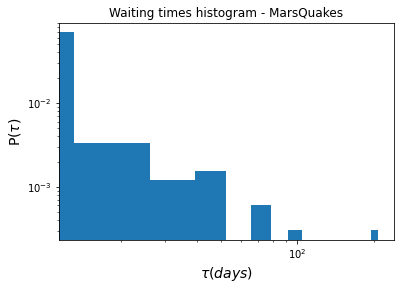

In [14]:
# Waiting Times without delta 
wtid = []

for i in range(len(quakes['magnitudes'])):
    if quakes['magnitudes'][i]<max(quakes['magnitudes']):
        firstEvent = quakes['times'][i]

        for j in range(i+1,len(quakes['magnitudes'])):
            if quakes['magnitudes'][j]>=quakes['magnitudes'][i]:
                secondEvent = quakes['times'][j]
                wtid.append((secondEvent-firstEvent).days)
                if (secondEvent-firstEvent).days < 0:
                    print(secondEvent)
                    print(firstEvent)
                breaker=True
                break;
        
    

hist, bins, patches = plt.hist(wtid,bins=round(math.sqrt(len(wtid))),density=True) 
plt.xscale('log')
plt.xlabel(r'$\tau(days)$', fontsize=14)
plt.yscale('log')
plt.ylabel(r'P($\tau$)', fontsize=14)
plt.title('Waiting times histogram - MarsQuakes')
#plt.savefig("waitingTimesMars.png")

In [15]:
# Create the data x,y from the hist and bins
# x = bins centers . First create empty array of the length of hist
x = np.zeros_like(hist)
# Append to it the centers of the bins
for i in range(1,len(bins)):
    x[i-1]=((bins[i]+bins[i-1])/2)

# Check for zeros in the hist list and cut both x and y where the first zero occurs
for i in range(len(hist)):
    if hist[i]==0:
        y=np.array(hist[:i])
        x=np.array(x[:i])
        break
    # If there is no zeros, make y=hist ( full data is taken into acoount)
    else:
        y=hist

# Renormalize the ydata to 1 
y_norm = [float(i)/sum(y) for i in y]

In [16]:
# Power law used to fit the connectivity distribution
def power_law(x, a, b):
    return a*np.power(x, -b)

Text(0.5, 0.98, 'Waiting Times MarsQuakes')

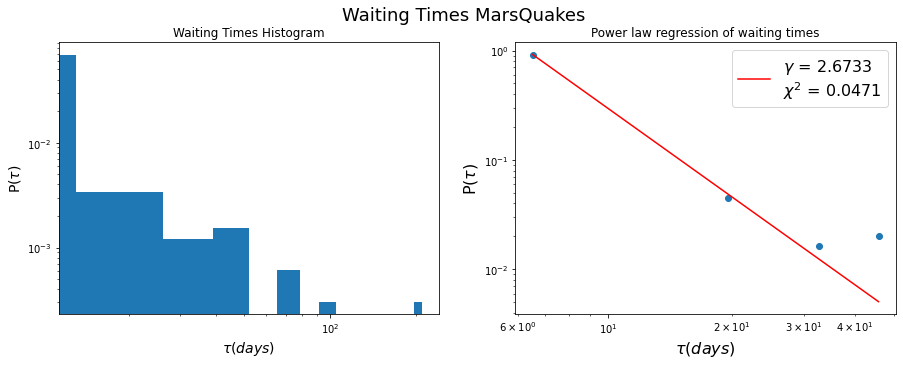

In [17]:
# Compute the power_law fit to our data 
pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
# Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))

# Plot the results
fig, ax = plt.subplots(1,2,figsize=(15,5))

# Histogram of degrees
ax[0].hist(wtid,bins=round(math.sqrt(len(wtid))),density=True)
ax[0].set_xscale('log')
ax[0].set_yscale('log')


# Title of histogram
ax[0].set_title('Waiting Times Histogram')
ax[0].set_xlabel(r'$\tau(days)$', fontsize=14)
ax[0].set_ylabel(r'P($\tau$)', fontsize=14)


# Connectivity distribution ( data + fit)
# The data, scattered
ax[1].scatter(x,y_norm)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
# The fit
ax[1].plot(x,power_law(x,*pars),
           label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
           color='red')

# Setting ticks
#ax[1].set_xticks([10, 20, 50, 100])
#ax[1].set_yticks([1.00, 0.1, 0.01, 0.001, 0.0001])
#ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# Legend : gamma coefficient of fit and chi_squared goodness of fit
ax[1].legend(loc='upper right',fontsize=16,frameon=True)

# Title of connectivity distribution ( data + fit )
ax[1].set_title('Power law regression of waiting times')
ax[1].set_xlabel(r'$\tau(days)$', fontsize=16)
ax[1].set_ylabel(r'P($\tau$)', fontsize=16);

plt.suptitle('Waiting Times MarsQuakes', fontsize = 18)
#plt.savefig("waitingTimesMarsRegression.png")

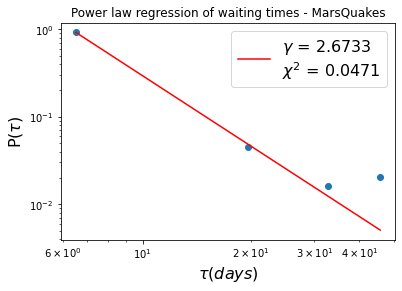

In [18]:
plt.figure()
# Connectivity distribution ( data + fit)
# The data, scattered
plt.scatter(x,y_norm)
plt.xscale('log')
plt.yscale('log')
# The fit
plt.plot(x,power_law(x,*pars),
           label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
           color='red')

# Setting ticks
#ax[1].set_xticks([10, 20, 50, 100])
#ax[1].set_yticks([1.00, 0.1, 0.01, 0.001, 0.0001])
#ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# Legend : gamma coefficient of fit and chi_squared goodness of fit
plt.legend(loc='upper right',fontsize=16,frameon=True)

# Title of connectivity distribution ( data + fit )
plt.title('Power law regression of waiting times - MarsQuakes')
plt.xlabel(r'$\tau(days)$', fontsize=16)
plt.ylabel(r'P($\tau$)', fontsize=16);

#plt.savefig("waitingTimesMarsOnlyRegression.png")

In [19]:
def waitingTimes2(quakes, delta):
    #quakeData['times']=pd.to_datetime(quakeData['times'])
    wtid = []
    
    for i in range(len(quakes['magnitudes'])):
        if quakes['magnitudes'][i]<max(quakes['magnitudes'])-delta:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['magnitudes'])):
                if quakes['magnitudes'][j]>=quakes['magnitudes'][i]+delta:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;
        

    return(wtid)

Text(0.5, 0.98, 'Waiting Times MarsQuakes - delta')

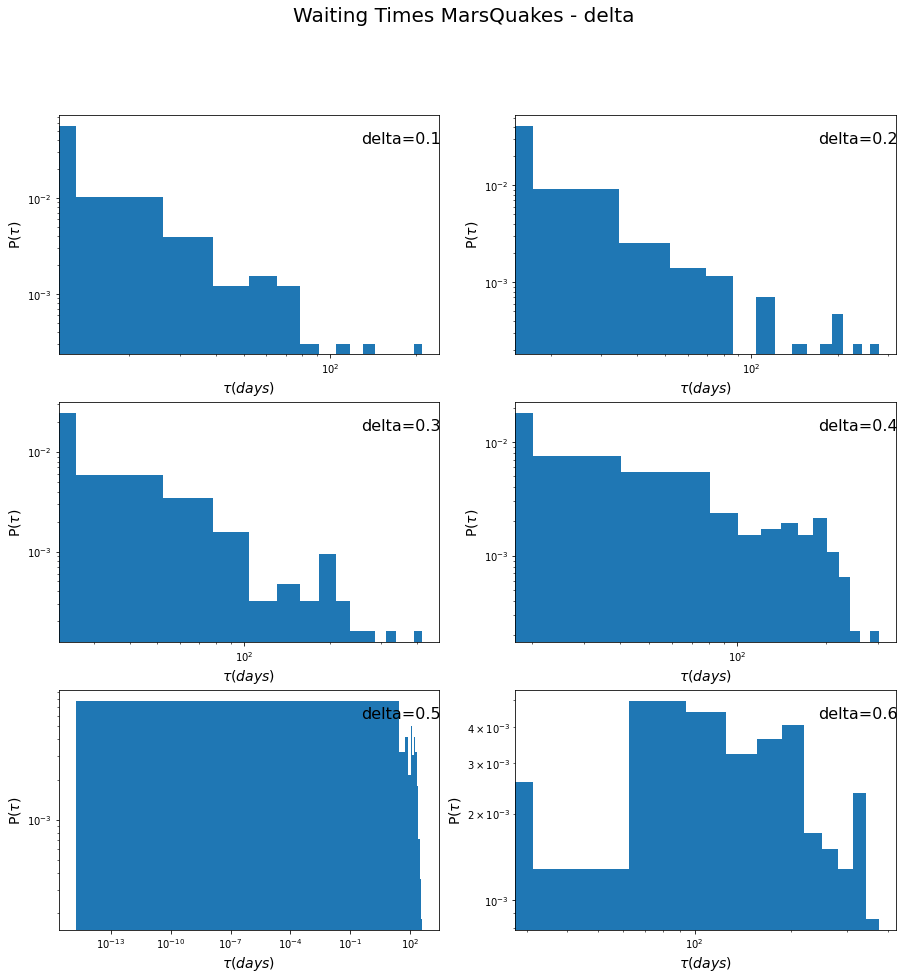

In [20]:
# Make 6 plots using different deltas

fig, ax = plt.subplots(3, 2, figsize=(15,15))#, sharex=True, sharey=True)

ax = np.ravel(ax)
delta =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['magnitudes'])):
        if quakes['magnitudes'][i]<max(quakes['magnitudes'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['magnitudes'])):
                if quakes['magnitudes'][j]>=quakes['magnitudes'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;
       
    #wtid = waitingTimes2(quakes, delta[i])
    ax[k].hist(wtid, bins=round(math.sqrt(len(wtid))),density=True)
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    ax[k].text(0.9, 0.9, f'delta={delta[k]}', ha='center', va='center',fontsize=16, transform=ax[k].transAxes)
    ax[k].set_xlabel(r'$\tau(days)$', fontsize=14)
    ax[k].set_ylabel(r'P($\tau$)', fontsize=14)

#t.tight_layout()
plt.suptitle('Waiting Times MarsQuakes - delta',fontsize=20)
#plt.savefig("waitingTimesMarsDeltaHistograms.png")

In [21]:
# DELTA POSITIVE WITH REGRESSIONS

Text(0.5, 0.98, 'Waiting Times MarsQuakes - delta ')

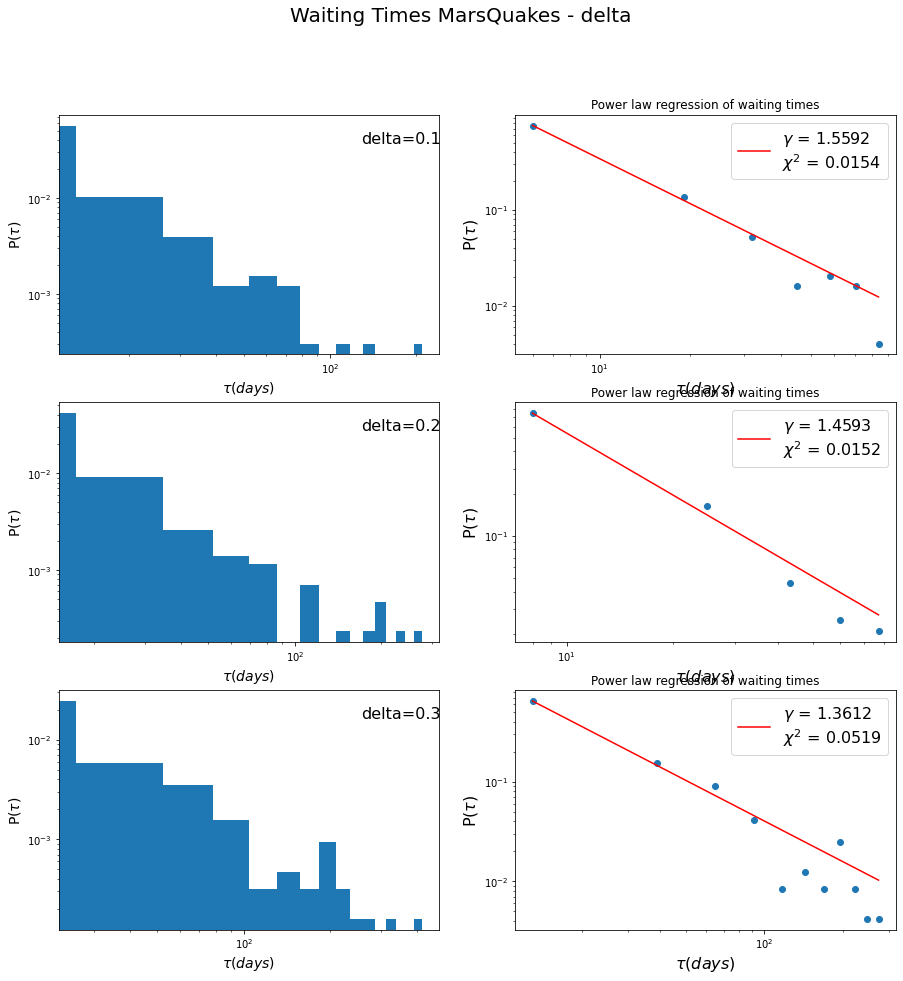

In [22]:
# Make 6 plots using different deltas

fig, axs = plt.subplots(3, 2, figsize=(15,15))#, sharex=True, sharey=True)

delta =[0.1, 0.2, 0.3]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['magnitudes'])):
        if quakes['magnitudes'][i]<max(quakes['magnitudes'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['magnitudes'])):
                if quakes['magnitudes'][j]>=quakes['magnitudes'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;


        
    #wtid = waitingTimes2(quakes, delta[i])
    axs[k,0].hist(wtid, bins=round(math.sqrt(len(wtid))),density=True)
    axs[k,0].set_xscale('log')
    axs[k,0].set_yscale('log')
    axs[k,0].text(0.9, 0.9, f'delta={delta[k]}', ha='center', va='center',fontsize=16, transform=axs[k,0].transAxes)
    axs[k,0].set_xlabel(r'$\tau(days)$', fontsize=14)
    axs[k,0].set_ylabel(r'P($\tau$)', fontsize=14)
    
    # Regressions 
    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    
    # Connectivity distribution ( data + fit)
    # The data, scattered
    axs[k,1].scatter(x,y_norm)
    axs[k,1].set_xscale('log')
    axs[k,1].set_yscale('log')
    # The fit
    axs[k,1].plot(x,power_law(x,*pars),
               label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    axs[k,1].legend(loc='upper right',fontsize=16,frameon=True)

    # Title of connectivity distribution ( data + fit )
    axs[k,1].set_title('Power law regression of waiting times')
    axs[k,1].set_xlabel(r'$\tau(days)$', fontsize=16)
    axs[k,1].set_ylabel(r'P($\tau$)', fontsize=16);
    

plt.suptitle('Waiting Times MarsQuakes - delta ',fontsize=20)
#plt.savefig("waitingTimesMarsDelta.png")

In [23]:
#DELTA NEGATIVE WITH REGRESSIONS

Text(0.5, 0.98, 'Waiting Times MarsQuakes - delta negative')

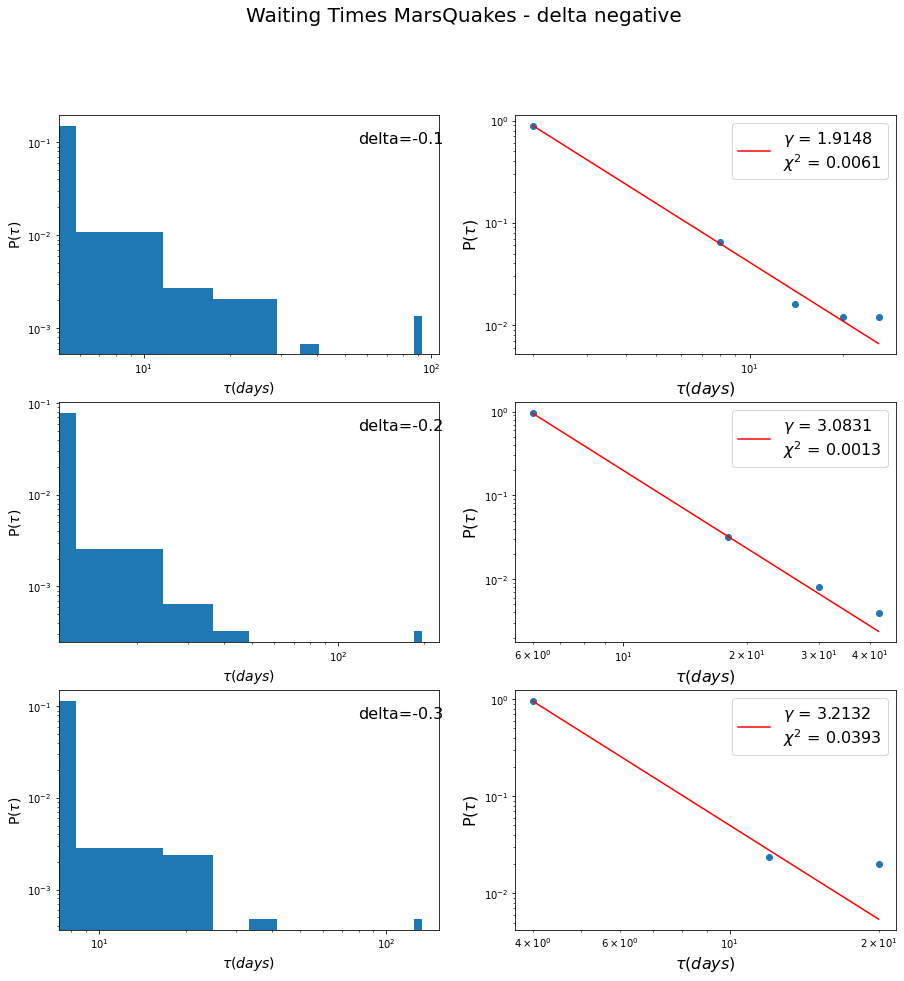

In [24]:
# Make 6 plots using different deltas

fig, axs = plt.subplots(3, 2, figsize=(15,15))#, sharex=True, sharey=True)

delta =[-0.1, -0.2, -0.3]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['magnitudes'])):
        if quakes['magnitudes'][i]<max(quakes['magnitudes'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['magnitudes'])):
                if quakes['magnitudes'][j]>=quakes['magnitudes'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append((secondEvent-firstEvent).days)
                    break;
        
        
    axs[k,0].hist(wtid, bins=round(math.sqrt(len(wtid))),density=True)
    axs[k,0].set_xscale('log')
    axs[k,0].set_yscale('log')
    axs[k,0].text(0.9, 0.9, f'delta={delta[k]}', ha='center', va='center',fontsize=16, transform=axs[k,0].transAxes)
    axs[k,0].set_xlabel(r'$\tau(days)$', fontsize=14)
    axs[k,0].set_ylabel(r'P($\tau$)', fontsize=14)
    
    # Regressions 
    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    
    # Connectivity distribution ( data + fit)
    # The data, scattered
    axs[k,1].scatter(x,y_norm)
    axs[k,1].set_xscale('log')
    axs[k,1].set_yscale('log')
    # The fit
    axs[k,1].plot(x,power_law(x,*pars),
               label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    axs[k,1].legend(loc='upper right',fontsize=16,frameon=True)

    # Title of connectivity distribution ( data + fit )
    #axs[k,1].set_title('Power law regression of waiting times')
    axs[k,1].set_xlabel(r'$\tau(days)$', fontsize=16)
    axs[k,1].set_ylabel(r'P($\tau$)', fontsize=16);
    

plt.suptitle('Waiting Times MarsQuakes - delta negative',fontsize=20)
#plt.savefig("waitingTimesMarsDeltaNegative.png")

In [25]:
# Only regressions


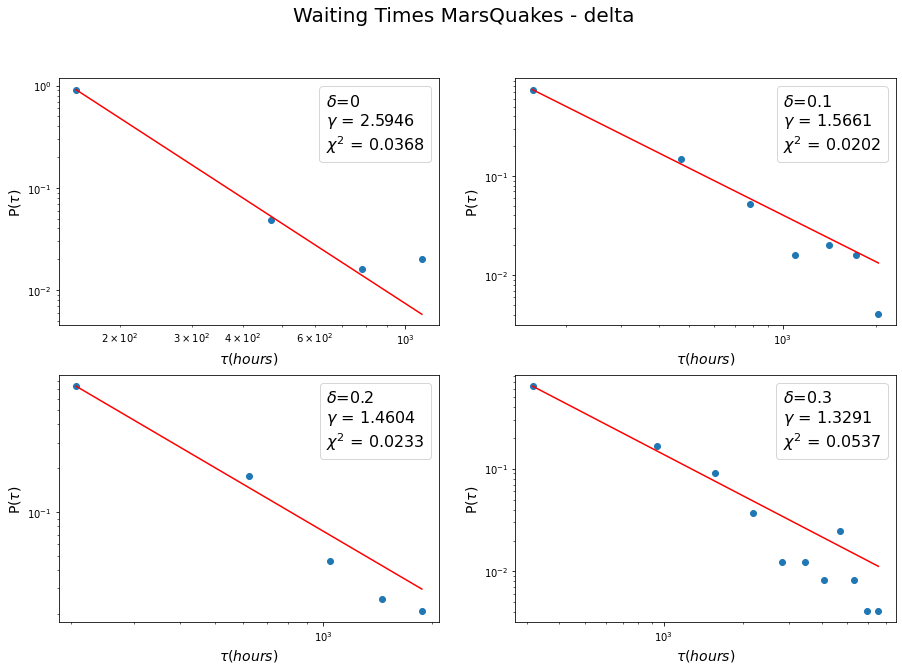

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(15,10),linewidth=10)#, sharex=True, sharey=True)

ax = np.ravel(ax)
delta =[0, 0.1, 0.2, 0.3]

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['magnitudes'])):
        if quakes['magnitudes'][i]<max(quakes['magnitudes'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['magnitudes'])):
                if quakes['magnitudes'][j]>=quakes['magnitudes'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append(timedelta.Timedelta(secondEvent-firstEvent).total.hours)
                    break;

    
    # Regressions 
    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    
    # Connectivity distribution ( data + fit)
    # The data, scattered
    ax[k].scatter(x,y_norm)
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    # The fit
    ax[k].plot(x,power_law(x,*pars),
               label=f'$\delta$={delta[k]}\n$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    ax[k].legend(handlelength=0, handletextpad=0,loc='upper right',fontsize=16,frameon=True)

    # Title of connectivity distribution ( data + fit )
    ax[k].set_xlabel(r'$\tau(hours)$', fontsize=16)
    ax[k].set_ylabel(r'P($\tau$)', fontsize=16);
    
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    ax[k].set_xlabel(r'$\tau(hours)$', fontsize=14)
    ax[k].set_ylabel(r'P($\tau$)', fontsize=14)
    
    
#plt.gcf().patch.set_edgecolor('k')
#plt.gcf().patch.set_linewidth(3)

#plt.rcParams['savefig.edgecolor'] = plt.gcf().patch.get_edgecolor()

plt.suptitle('Waiting Times MarsQuakes - delta',fontsize=20)
plt.savefig("waitingTimes_marsDeltas.png")

In [74]:
# INDIVIDUALLY
import matplotlib

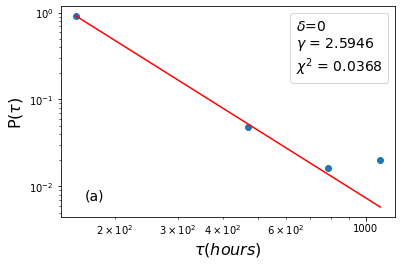

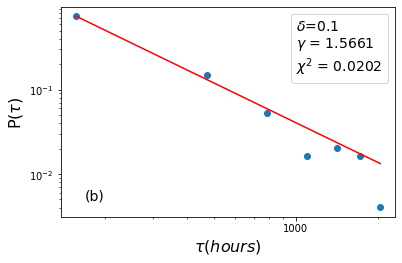

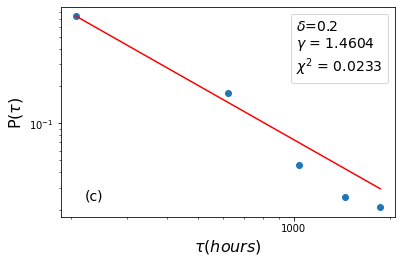

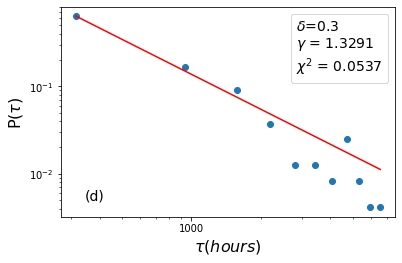

In [78]:
delta =[0, 0.1, 0.2, 0.3]
labelss = ['a','b','c','d']

for k in range(len(delta)):
    wtid = []
    
    for i in range(len(quakes['magnitudes'])):
        if quakes['magnitudes'][i]<max(quakes['magnitudes'])-delta[k]:
            firstEvent = quakes['times'][i]

            for j in range(i+1,len(quakes['magnitudes'])):
                if quakes['magnitudes'][j]>=quakes['magnitudes'][i]+delta[k]:
                    secondEvent = quakes['times'][j]
                    wtid.append(timedelta.Timedelta(secondEvent-firstEvent).total.hours)
                    break;
                    
    hist,bins = np.histogram(wtid, bins=round(math.sqrt(len(wtid))))
    # Create the data x,y from the hist and bins
    # x = bins centers . First create empty array of the length of hist
    x = np.zeros_like(hist)
    # Append to it the centers of the bins
    for i in range(1,len(bins)):
        x[i-1]=((bins[i]+bins[i-1])/2)

    # Check for zeros in the hist list and cut both x and y where the first zero occurs
    for i in range(len(hist)):
        if hist[i]==0:
            y=np.array(hist[:i])
            x=np.array(x[:i])
            break
        # If there is no zeros, make y=hist ( full data is taken into acoount)
        else:
            y=hist

    # Renormalize the ydata to 1 
    y_norm = [float(i)/sum(y) for i in y]

    
    # Compute the power_law fit to our data 
    pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)
    # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
    chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
    
    # Connectivity distribution ( data + fit)
    fig = plt.figure()
    ax = fig.add_subplot()

    # The data, scattered
    ax.scatter(x,y_norm)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # The fit
    ax.plot(x,power_law(x,*pars),
               label=f'$\delta$={delta[k]}\n$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
               color='red')
    
    # Legend : gamma coefficient of fit and chi_squared goodness of fit
    ax.legend(handlelength=0, handletextpad=0,loc='upper right',fontsize=14,frameon=True)
    
    #plt.text(0.5,0.5,f'{labelss[k]}',fontsize=14)
    ax.text(0.1, 0.1, f'({labelss[k]})',fontsize=14, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    # Title of connectivity distribution ( data + fit )
    ax.set_xlabel(r'$\tau(hours)$', fontsize=16)
    ax.set_ylabel(r'P($\tau$)', fontsize=16);
    
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    #ax[k].set_xscale('log')
    #ax[k].set_yscale('log')
    #ax[k].set_xlabel(r'$\tau(days)$', fontsize=14)
    #ax[k].set_ylabel(r'P($\tau$)', fontsize=14)
    plt.gcf().subplots_adjust(bottom=0.15)
    
    plt.savefig(f'waitingTimes_marsDeltas_{labelss[k]}.png')


In [77]:
bins

array([4.0000e+00, 6.2950e+02, 1.2550e+03, 1.8805e+03, 2.5060e+03,
       3.1315e+03, 3.7570e+03, 4.3825e+03, 5.0080e+03, 5.6335e+03,
       6.2590e+03, 6.8845e+03, 7.5100e+03, 8.1355e+03, 8.7610e+03,
       9.3865e+03, 1.0012e+04])